In [1]:
import pandas as pd
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn import preprocessing

In [2]:
# reading csv files
data =  pd.read_csv("C:/Users/Mohsen/Desktop/Autism-Adult-Data.csv")
df=pd.DataFrame(data)
print(df)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         1         1         1         0         0         1   
1           1         1         0         1         0         0         0   
2           1         1         0         1         1         0         1   
3           1         1         0         1         0         0         1   
4           1         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
699         0         1         0         1         1         0         1   
700         1         0         0         0         0         0         0   
701         1         0         1         1         1         0         1   
702         1         0         0         1         1         0         1   
703         1         0         1         1         1         0         1   

     A8_Score  A9_Score  A10_Score  ... gender       ethnicity jundice aust

In [3]:

print(df)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         1         1         1         0         0         1   
1           1         1         0         1         0         0         0   
2           1         1         0         1         1         0         1   
3           1         1         0         1         0         0         1   
4           1         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
699         0         1         0         1         1         0         1   
700         1         0         0         0         0         0         0   
701         1         0         1         1         1         0         1   
702         1         0         0         1         1         0         1   
703         1         0         1         1         1         0         1   

     A8_Score  A9_Score  A10_Score  ... gender       ethnicity jundice aust

In [4]:
df.shape

(704, 21)

In [5]:
df.head(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,18 and more,?,NO
5,1,1,1,1,1,0,1,1,1,1,...,m,Others,yes,no,United States,no,9,18 and more,Self,YES
6,0,1,0,0,0,0,0,1,0,0,...,f,Black,no,no,United States,no,2,18 and more,Self,NO
7,1,1,1,1,0,0,0,0,1,0,...,m,White-European,no,no,New Zealand,no,5,18 and more,Parent,NO
8,1,1,0,0,1,0,0,1,1,1,...,m,White-European,no,no,United States,no,6,18 and more,Self,NO
9,1,1,1,1,0,1,1,1,1,0,...,m,Asian,yes,yes,Bahamas,no,8,18 and more,Health care professional,YES


In [6]:
df.loc[:,"austim"].mode()

0    no
dtype: object

In [7]:
df.loc[:,"austim"].replace("?", "White-European",inplace=True)

In [8]:
df.loc[:,"ethnicity"].mode()


0    White-European
dtype: object

In [9]:
df.loc[:,"ethnicity"].replace("?", "White-European",inplace=True)


In [10]:
df.loc[:,"relation"].mode()

0    Self
dtype: object

In [11]:
df.loc[:,"relation"].replace("?", "Self",inplace=True)

In [12]:
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [13]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [14]:
#Which attributes seem to be correlated
correlation =df.corr(method='pearson')
correlation

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
A1_Score,1.000000,0.011539,0.074096,0.127814,0.169369,0.110199,0.217538,0.147640,0.145452,0.118413,0.397454
A2_Score,0.011539,1.000000,0.223921,0.158998,0.153821,0.185864,-0.041768,0.035408,0.205421,0.068883,0.392540
A3_Score,0.074096,0.223921,1.000000,0.412722,0.264927,0.268846,0.078216,0.017771,0.315113,0.168454,0.552356
A4_Score,0.127814,0.158998,0.412722,1.000000,0.306806,0.295152,0.151236,0.008617,0.327673,0.210968,0.586025
A5_Score,0.169369,0.153821,0.264927,0.306806,1.000000,0.392354,0.238589,0.102086,0.396582,0.267561,0.639706
A6_Score,0.110199,0.185864,0.268846,0.295152,0.392354,1.000000,0.175489,0.100123,0.479422,0.294435,0.630012
A7_Score,0.217538,-0.041768,0.078216,0.151236,0.238589,0.175489,1.000000,0.085403,0.189480,0.252107,0.454848
A8_Score,0.147640,0.035408,0.017771,0.008617,0.102086,0.100123,0.085403,1.000000,0.101733,0.100782,0.324020
A9_Score,0.145452,0.205421,0.315113,0.327673,0.396582,0.479422,0.189480,0.101733,1.000000,0.283340,0.661205
A10_Score,0.118413,0.068883,0.168454,0.210968,0.267561,0.294435,0.252107,0.100782,0.283340,1.000000,0.537205


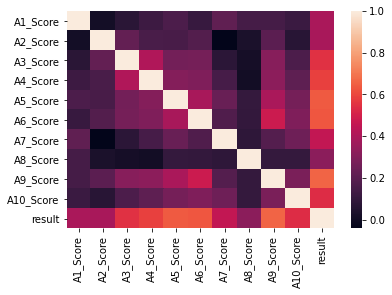

In [15]:
import seaborn as sns
sns.heatmap(correlation)

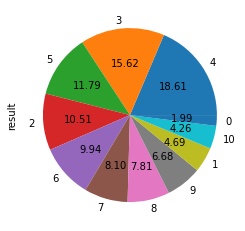

In [16]:
# balanced dataset and Normalize the dataset 
df['result'].value_counts()
# dataset is imbalanced 
df['result'].value_counts().plot.pie(autopct='%.2f')

In [17]:
import pandas as pd
credithistory_dataset = pd.DataFrame(df)
credithistory_dataset

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,White-European,no,no,Egypt,no,2,18 and more,Self,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,White-European,no,no,Russia,no,7,18 and more,Self,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6,18 and more,Self,NO


In [18]:
df['gender'] = df['gender'].replace(['m'],'0')
df['gender'] = df['gender'].replace(['f'],'1')
df['jundice']=df['jundice'].replace(['no'],'1')
df['jundice']=df['jundice'].replace(['yes'],'1')
df['Class/ASD']=df['Class/ASD'].replace(['NO'],'0')
df['Class/ASD']=df['Class/ASD'].replace(['YES'],'1')
df['relation']=df['relation'].replace(['Self'],'1')
df['relation']=df['relation'].replace(['Parent'],'0')
df['used_app_before']=df['used_app_before'].replace(['no'],'0')
df['used_app_before']=df['used_app_before'].replace(['yes'],'1')
df['austim']=df['austim'].replace(['no'],'0')
df['austim']=df['austim'].replace(['yes'],'1')
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,1,White-European,1,0,United States,0,6,18 and more,1,0
1,1,1,0,1,0,0,0,1,0,1,...,0,Latino,1,1,Brazil,0,5,18 and more,1,0
2,1,1,0,1,1,0,1,1,1,1,...,0,Latino,1,1,Spain,0,8,18 and more,0,1
3,1,1,0,1,0,0,1,1,0,1,...,1,White-European,1,1,United States,0,6,18 and more,1,0
4,1,0,0,0,0,0,0,1,0,0,...,1,White-European,1,0,Egypt,0,2,18 and more,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,1,White-European,1,0,Russia,0,7,18 and more,1,1
700,1,0,0,0,0,0,0,1,0,1,...,0,Hispanic,1,0,Mexico,0,3,18 and more,0,0
701,1,0,1,1,1,0,1,1,0,1,...,1,White-European,1,0,Russia,0,7,18 and more,1,1
702,1,0,0,1,1,0,1,0,1,1,...,0,South Asian,1,0,Pakistan,0,6,18 and more,1,0


In [ ]:
X = df.drop(['austim', 'ethnicity', 'contry_of_res','age_desc'], axis=1)
X.head

In [29]:
X = df[['A1_Score' ,'A2_Score','A3_Score' ,'A4_Score' ,'A5_Score' ,'A6_Score' ,'A7_Score','A8_Score', 'A9_Score' ,'A10_Score','result']]

In [30]:
X

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
0,1,1,1,1,0,0,1,1,0,0,6
1,1,1,0,1,0,0,0,1,0,1,5
2,1,1,0,1,1,0,1,1,1,1,8
3,1,1,0,1,0,0,1,1,0,1,6
4,1,0,0,0,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,7
700,1,0,0,0,0,0,0,1,0,1,3
701,1,0,1,1,1,0,1,1,0,1,7
702,1,0,0,1,1,0,1,0,1,1,6


In [31]:
Y = df['austim']
Y.head(20)


0     0
1     1
2     1
3     1
4     0
5     0
6     0
7     0
8     0
9     1
10    0
11    0
12    0
13    0
14    0
15    1
16    0
17    0
18    1
19    0
Name: austim, dtype: object

In [32]:
# Split data set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state=1)
Y_test

402    0
422    0
331    0
189    0
185    0
      ..
459    0
346    0
582    0
103    0
323    1
Name: austim, Length: 212, dtype: object

In [33]:
# Normalize data set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
#Random Forests
# Feature Scaling
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
model = clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)
Y_test.shape
Y_pred.shape
#Import scikit-learn metrics module for accuracy calculation
#Evaluating the Algorithm
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))


Mean Absolute Error: 0.13679245283018868
Mean Squared Error: 0.13679245283018868
Root Mean Squared Error: 0.36985463743231434
Accuracy: 0.8632075471698113


In [37]:
# Evaluate a Random Forest model using k-fold cross-validation
# prepare the cross-validation procedure
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# Evaluate model
scores = cross_val_score(model, X_test, Y_test, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Accuracy: 0.915 (0.077)


In [44]:
#Support Vector Machine
Y_train=Y_train.astype(float)
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, Y_train)
# Accuracy with Cross validation for SVM 
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=1, kernel='linear')
model = svc.fit(X_train, Y_train)
# evaluate model
scores = cross_val_score(model, X_test, Y_test, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Accuracy: 0.915 (0.075)


In [48]:
#Evaluate a logistic regression model using k-fold cross-validation
from sklearn.linear_model import LogisticRegression
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# Evaluate model
scores = cross_val_score(model, X_test, Y_test, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Accuracy: 0.906 (0.078)


In [51]:
#the Naive Bayes Algorithm
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Accuracy and Cross validation
from sklearn.model_selection import cross_val_score
# use the same model as before
clf = clf.fit(X_train,Y_train)
# X,y will automatically devided by 3 folder, the scoring I will still use the accuracy
scores = cross_val_score(model, X_train, Y_train, cv=10, scoring='accuracy')
# print all 5 times scores 
print(scores)
# then I will do the average about these five scores to get more accuracy score.
print('Accuracy',scores.mean())


[0.62       0.7        0.73469388 0.71428571 0.79591837 0.75510204
 0.85714286 0.85714286 0.73469388 0.75510204]
Accuracy 0.752408163265306
